In [2]:
from matplotlib import animation, rc
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from IPython.display import HTML

import vtktools as vtk

import numpy as np
import pickle


In [3]:
import sys
sys.path.insert(0,"cmake-build-debug/")
import capmd

dir(capmd)

['Parameters',
 'VectorInt',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'particle',
 'simulation']

## Example simulation run from here

In [3]:
sim = capmd.simulation();

In [4]:
sim.N = 10;
sim.dt = 0.01

In [5]:
sim.initialise();
p = sim.getParticle(0);
x = p.getPosition();
sim.popSize()

250

In [6]:
cutoff = 2.5
#sim.cutoff =cutoff

sim.tau = 10
# sim.factive = 0.1

In [7]:
# sim.initialise();
# p = sim.getParticle(0);
# x = p.getPosition();
# sim.popSize()

In [8]:
N = sim.popSize()
NB = sim.boundarySize()

a = range(N + NB)
a

range(0, 378)

In [9]:
index = capmd.VectorInt(a)

In [10]:
a = sim.getPopulationPosition(index)
r = sim.getPopulationRadius(index)

b = sim.getBoundaryPosition()

In [11]:
a

[[-16.0, 16.0],
 [-15.0, 16.0],
 [-14.0, 16.0],
 [-13.0, 16.0],
 [-12.0, 16.0],
 [-11.0, 16.0],
 [-10.0, 16.0],
 [-9.0, 16.0],
 [-8.0, 16.0],
 [-7.0, 16.0],
 [-6.0, 16.0],
 [-5.0, 16.0],
 [-4.0, 16.0],
 [-3.0, 16.0],
 [-2.0, 16.0],
 [-1.0, 16.0],
 [0.0, 16.0],
 [1.0, 16.0],
 [2.0, 16.0],
 [3.0, 16.0],
 [4.0, 16.0],
 [5.0, 16.0],
 [6.0, 16.0],
 [7.0, 16.0],
 [8.0, 16.0],
 [9.0, 16.0],
 [10.0, 16.0],
 [11.0, 16.0],
 [12.0, 16.0],
 [13.0, 16.0],
 [14.0, 16.0],
 [15.0, 16.0],
 [16.0, -16.0],
 [16.0, -15.0],
 [16.0, -14.0],
 [16.0, -13.0],
 [16.0, -12.0],
 [16.0, -11.0],
 [16.0, -10.0],
 [16.0, -9.0],
 [16.0, -8.0],
 [16.0, -7.0],
 [16.0, -6.0],
 [16.0, -5.0],
 [16.0, -4.0],
 [16.0, -3.0],
 [16.0, -2.0],
 [16.0, -1.0],
 [16.0, 0.0],
 [16.0, 1.0],
 [16.0, 2.0],
 [16.0, 3.0],
 [16.0, 4.0],
 [16.0, 5.0],
 [16.0, 6.0],
 [16.0, 7.0],
 [16.0, 8.0],
 [16.0, 9.0],
 [16.0, 10.0],
 [16.0, 11.0],
 [16.0, 12.0],
 [16.0, 13.0],
 [16.0, 14.0],
 [16.0, 15.0],
 [-16.0, -16.0],
 [-15.0, -16.0],
 [-14.0, -16

In [12]:
x = []
y = []
for n in a:
    x.append(n[0])
    y.append(n[1])

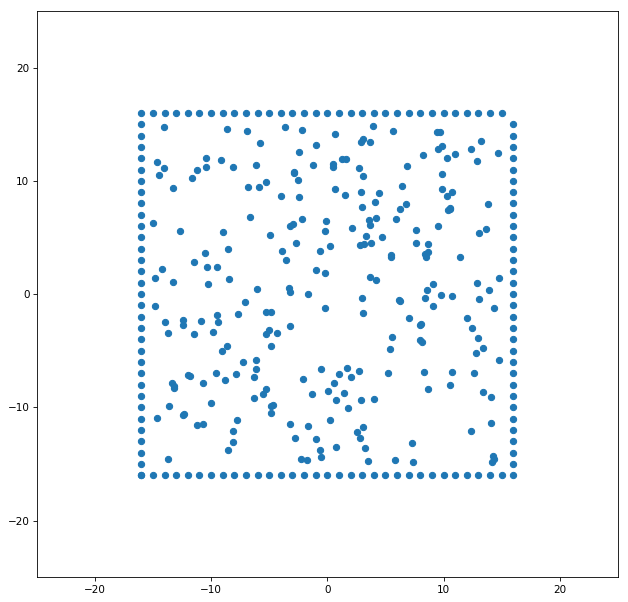

In [13]:
dpi = 75
fig,ax = plt.subplots(figsize=(10,10), dpi=dpi)

plt.scatter(x,y)
plt.xlim(-25,25)
plt.ylim(-25,25)
plt.show()

In [14]:

track_id = NB
index = capmd.VectorInt([track_id])

In [15]:
a = sim.getPopulationPosition(index)


In [16]:
xp = []
yp = []
for n in range(len(index)):
    xp.append(a[n][0])
    yp.append(a[n][1])

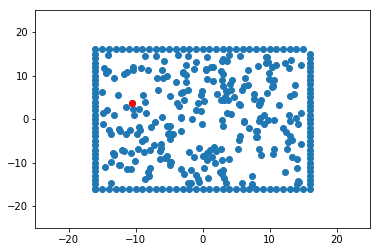

In [17]:
plt.scatter(x,y)
plt.scatter(xp,yp, color = 'r')
plt.xlim(-25,25)
plt.ylim(-25,25)
plt.show()

In [18]:
index = capmd.VectorInt([0])

In [19]:
a = sim.getPopulationPosition(index)
n = []
xn = []
yn = []

for i in index:
    print(i)
    sim.getParticle(i)
    pn = sim.getNeighbours(sim.getParticle(i));
    n.append(sim.getPopulationPosition(pn))
    for nx in sim.getPopulationPosition(pn):
        xn.append(nx[0])
        yn.append(nx[1])
# xn
# yn

0


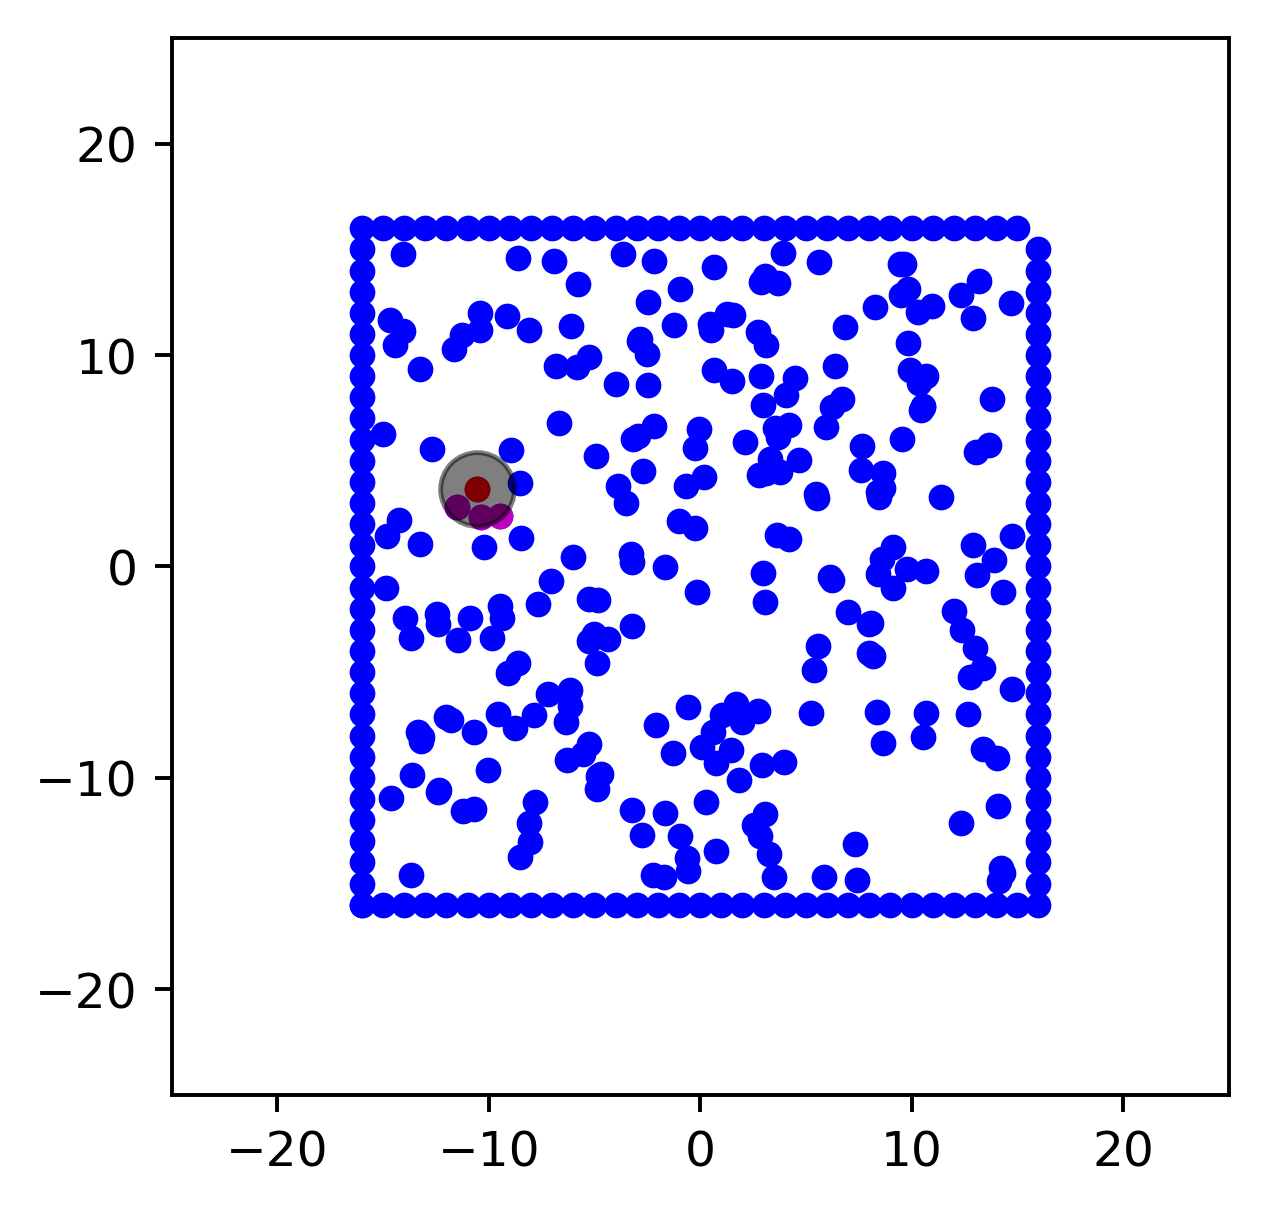

In [20]:
s = lambda x : [1e2*r for r in x]

#s_linear = [20*n for n in range(len(x))]

fig, ax = plt.subplots(dpi=350)
x1,x2 = -25,25


plt.xlim(x1,x2)
plt.ylim(x1,x2)

# for v in np.arange(x1, x2):
#     ax.axvline(v - 0.5)
#     ax.axvline(v + 0.5)
#     ax.axhline(v - 0.5)
#     ax.axhline(v + 0.5)
    
ax.set_xlim(x1, x2)
ax.set_ylim(x1, x2)

ax.set_aspect(1)
fig.canvas.draw()
s = ((ax.get_window_extent().width  / (x2-x1+1.) * 72./fig.dpi) ** 2)

plt.scatter(x,y, color='b', s=s) #boundary
plt.scatter(xn,yn, color = 'm', s=s) #near particles
plt.scatter(xp,yp, color='r', s=s)  #tracking particle
plt.scatter(xp,yp, color='k', s=5*cutoff*s, alpha=0.5) #influence

plt.show()

In [21]:
sim.move()


## Generate trajectory for MSD here

In [22]:
sim = capmd.simulation();

In [23]:
sim.initialise()

In [1]:
trajectory = []
Nt = int(1e6)
track_id = NB

NameError: name 'NB' is not defined

# 

In [ ]:
# for t in range(Nt):
#     sim.move()
#     a = sim.getPopulationPosition([track_id])
#     if t % 10000 == 0:
#         print(t)

#     trajectory.append(a)
# trajectory = np.array([np.array(xi) for xi in trajectory]

In [ ]:
# # pickle.dump( trajectory, open( "trajectory.p", "wb" ) )
# trajectory = pickle.load( open( "trajectory.p", "rb" ) )


In [ ]:
def MSD(trajectory):
    r = []
    for x in trajectory:
        r.append(np.sqrt(x[0][0]**2 + x[0][1]**2))
    diff = np.diff(r)
    diff_sq = diff**2
    MSD = np.mean(diff_sq)
    return MSD

## Example animation using Python from here

In [ ]:
index = capmd.VectorInt(range(N + NB))

a = sim.getPopulationPosition(index)
x = []
y = []
xp = []
yp = []

for n in range(len(index)):
    x.append(a[n][0])
    y.append(a[n][1])

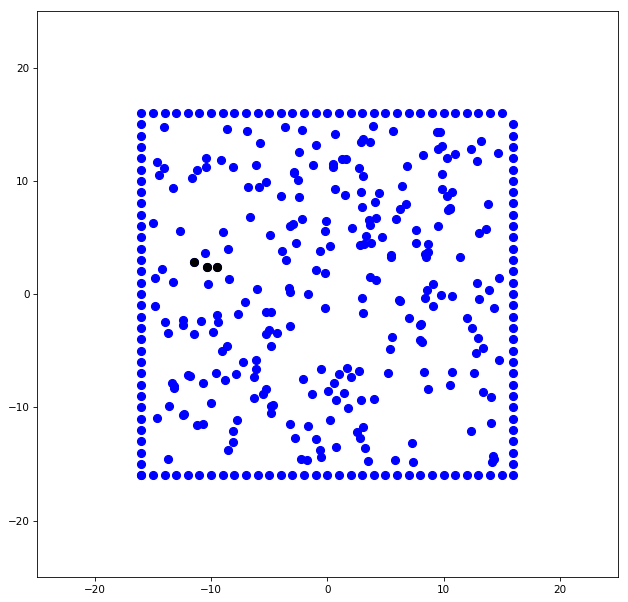

In [ ]:

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(10,10), dpi=dpi)

ax.set_xlim(( -25,25))
ax.set_ylim((-25, 25))

c = np.random.rand(len(index),3)
scat1 = ax.scatter(x, y, s=60,  c='blue', vmin=-1.5, vmax=2, cmap="hsv")
scat2 = ax.scatter(xn, yn, s=60,  c='black')
scat3 = ax.scatter(xp, yp, s=60,  c='red')
line, = ax.plot(xp, yp, '--r')


In [ ]:
# initialization function: plot the background of each frame
def init():
    return (scat1,scat2,line)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    sim.move()
    a = sim.getPopulationPosition(index)
    p = sim.getPopulationPosition([track_id])

    x = []
    y = []
    xn = []
    yn = []

    for n in range(len(index)):
        x.append(a[n][0])
        y.append(a[n][1])
        pn = sim.getNeighbours(sim.getParticle(0));
        for nx in sim.getPopulationPosition(pn):
            xn.append(nx[0])
            yn.append(nx[1])
        
    scat1.set_offsets(np.c_[x, y])
    scat2.set_offsets(np.c_[xn, yn])
    xp.append(p[0][0])
    yp.append(p[0][1])
    line.set_data(xp,yp)
    ax.set_title('t = {}, length of neighbourlist = {}'.format(i*sim.dt, len(xn)))
    return (scat1,scat2, line)

In [ ]:
# # # call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=200, blit=True)


In [ ]:
HTML(anim.to_html5_video())


In [ ]:
# anim.save('dt_0.01_factive_0.1_tau_10_N_250_L_30_wboundary.mp4')

## VTK example here:

In [ ]:
# vtk_writer = vtk.VTK_XML_Serial_Unstructured()


In [ ]:
# for i in range(100):
    
#     sim.move()
#     a = sim.getPopulationPosition(index)
#     p = sim.getPopulationPosition([track_id])
#     r = sim.getPopulationRadius(index)

    
#     x = []
#     y = []
#     z = []
#     rn = []
#     for n in range(len(index)):
#         x.append(a[n][0])
#         y.append(a[n][1])        
#         z.append(0.0)
#         rn.append(r[n])
#     vtk_writer.snapshot("vtk_test_{}.vtu".format(i), x, y, z, radii = rn)

In [ ]:
# vtk_writer.writePVD("vtk_test.pvd")